<a href="https://colab.research.google.com/github/Torough/BEASTDL/blob/master/BEAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mount Images From Google Drive

In [0]:
#Plot Neural Network layers
#https://www.analyticsvidhya.com/blog/2019/05/understanding-visualizing-neural-networks/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive'
           )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##IMPORTS

In [0]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import keras
import sys, cv2, glob, os, time
from tqdm import tqdm
from sklearn import metrics, svm, metrics
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Flatten, Input, BatchNormalization, Activation, Dropout

from keras.layers import  MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet

import matplotlib.pyplot as plt
from os import listdir
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import copy

Using TensorFlow backend.


In [0]:
print (cv2.__version__)


3.4.3


##Log Gabor Filter

In [0]:
!pip install LogGabor
from LogGabor import LogGabor

     |████████████████████████████████| 174kB 7.8MB/s 
  Created wheel for NeuroTools: filename=NeuroTools-0.3.1-cp36-none-any.whl size=120979 sha256=f6e6e874bb21680687fc81b8e79cc591bf1a771386791691cc841b0230faa909
  Stored in directory: /root/.cache/pip/wheels/15/a0/b8/d9a594c2a83d0d4f19bf28673a2df51f374f2f2a9360e43f69
Successfully built NeuroTools


##Initial Data Generator

In [0]:
'''path = "/content/gdrive/My Drive/project/BEAST1/Anger/"


def loadImages(path):
    count = 1
    images = []
    imageList = sorted(listdir(path))
    for i in imageList:
        image = load_img(path + i)
        image = img_to_array(image)
        images.append(image)
        if (count % 100 == 0):
            print("Processing image", count)
        count += 1
    print("Done.")
    return np.asarray(images, dtype='float')
    
    
#loadImages(path)



##Data Directory (Plot)

In [0]:
'''for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
'''    
  

In [0]:
listdir("/content/gdrive/My Drive/project/BEAST1/Anger/")

DATADIR = "/content/gdrive/My Drive/project/BEAST1/"

CATEGORIES = ["Anger", "Fear", "Happy", "Sad"]

'''for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
'''    
  

"for category in CATEGORIES: \n    path = os.path.join(DATADIR,category) \n    for img in os.listdir(path):  \n        img_array = cv2.imread(os.path.join(path,img))  # convert to array\n        plt.imshow(img_array, cmap='gray')  # graph it\n        plt.show()  # display!\n\n        break  # we just want one for now so break\n    break  #...and one more!\n"

##Data Generator

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # 

        path = os.path.join(DATADIR,category)  # create path to Emotion categories
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            
                #img_array = cv2.imread(os.path.join(path,img)) 
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (224, 224))  # resize to normalize data size
                #new_array = cv2.resize(img_array, (138, 310))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            #except Exception as e:  # in the interest in keeping the output clean...
            #   pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))




100%|██████████| 62/62 [00:19<00:00,  3.22it/s]

254


In [0]:
#training_data
len(training_data)


254

In [0]:

random.shuffle(training_data)



##Creation and Reshaping of training Data

In [0]:
Features = []
y = []

for features,label in training_data:
    Features.append(features)
    y.append(label)

#print(X[0].reshape(-1, 138, 310, 1))



##Reshaping Data (SVM and VGG models) 

In [0]:
X = np.array(Features).reshape(-3, 224, 224, 3)
#X = np.array(Features).reshape([-2, 224, 224, 2])


##One hot 

In [0]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example

y = array(y)
svm_y = copy.copy(y)
# one hot encode
y = to_categorical(y)




##Split Data into train and test 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


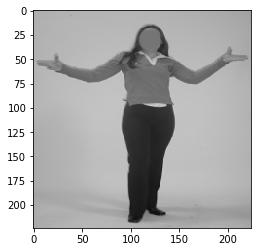

In [0]:
image = X[0]
plt. imshow(X[0], cmap="gray")

In [0]:
y_test

In [0]:
X.shape

(254, 224, 224, 3)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from collections import Counter
len(y_train)


#SVM

In [0]:


to_two_dimensional = np.array(Features).reshape(-3, 224, 224, 3)
n_samples = len(to_two_dimensional)
#flattened = np.array(Features).reshape((n_samples,-1))
flattened = np.array(to_two_dimensional).reshape((n_samples,-1))

In [0]:
flattened.shape

(254, 150528)

In [0]:
# one hot encode

#svm_y = array(y)

#svm_y = to_categorical(svm_y)
#svm_y = np.argmax(svm_y, axis=1)


X_trains, X_tests, y_trains, y_tests = train_test_split(flattened, svm_y, stratify=svm_y, test_size=0.25, random_state=42)



In [0]:

print('Training data and target sizes: \n{}, {}'.format(X_trains.shape,y_trains.shape))
print('Test data and target sizes: \n{}, {}'.format(X_tests.shape,y_tests.shape))

Training data and target sizes: 
(190, 150528), (190,)
Test data and target sizes: 
(64, 150528), (64,)


In [0]:
X_trains[0].shape

(150528,)

In [0]:
classifier = svm.SVC(gamma=0.001)
classifier_two = svm.LinearSVC()

classifier.fit(X_trains,y_trains)
classifier_two.fit(X_trains,y_trains)

y_pred = classifier.predict(X_tests)
y_pred_two = classifier_two.predict(X_tests)


print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_tests, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_tests, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.27      1.00      0.42        17
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        16

    accuracy                           0.27        64
   macro avg       0.07      0.25      0.10        64
weighted avg       0.07      0.27      0.11        64


Confusion matrix:
[[ 0 16  0  0]
 [ 0 17  0  0]
 [ 0 15  0  0]
 [ 0 16  0  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


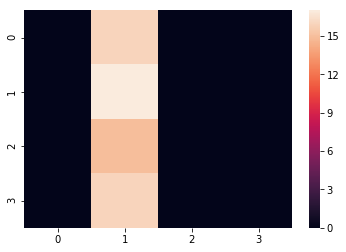

In [0]:
sns.heatmap(metrics.confusion_matrix(y_tests, y_pred))

#Base CNN Model

numpy.ndarray

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.LeakyReLU(alpha=0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4, activation='sigmoid'))
opt = keras.optimizers.Adam(0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

W0813 21:57:18.281096 140057004943232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 21:57:18.331903 140057004943232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 21:57:18.342234 140057004943232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 21:57:18.409005 140057004943232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0813 21:57:18.410692 1400570049

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 242, 242, 488)     13664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 242, 242, 488)     1952      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 242, 242, 488)     0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28579232)          0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 114316932 
Total params: 114,332,548
Trainable params: 114,331,572
Non-trainable params: 976
_________________________________________________________________


In [0]:
y_train = to_categorical(y_train)

NameError: ignored

In [0]:
base = model.fit(X_train,y_train,
          batch_size=32,
          epochs=3,
          
          )

Epoch 1/3
190/190 [==============================] - 34s 180ms/step - loss: 5.0567 - acc: 0.6303
Epoch 2/3
190/190 [==============================] - 31s 162ms/step - loss: 5.9902 - acc: 0.6263
Epoch 3/3
190/190 [==============================] - 31s 164ms/step - loss: 5.9902 - acc: 0.6263


In [0]:
test_score = model.evaluate(X_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

84/84 [==============================] - 4s 44ms/step
Test loss 4.0295, accuracy 75.00%


#Lecun CNN Model

In [0]:
#Lecun Model
#Instantiate an empty model
from keras import layers
modell = Sequential()

# C1 Convolutional Layer
modell.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(244, 244, 3)))

# S2 Pooling Layer
modell.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
modell.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
modell.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
modell.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
modell.add(layers.Flatten())

# FC6 Fully Connected Layer
modell.add(layers.Dense(84, activation='relu'))

#Output Layer with softmax activation
modell.add(layers.Dense(4, activation='softmax'))

# Compile the model
modell.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

W0731 02:58:23.645202 139698713438080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [0]:
modell.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 240, 240, 6)       456       
_________________________________________________________________
average_pooling2d_9 (Average (None, 239, 239, 6)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 235, 235, 16)      2416      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 117, 117, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 113, 113, 120)     48120     
_________________________________________________________________
flatten_10 (Flatten)         (None, 1532280)           0         
_________________________________________________________________
dense_15 (Dense)             (None, 84)                128711604 
__________

In [0]:
modell.fit(x=X_train,y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)
test_score = modell.evaluate(X_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

#DataGen

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

# here's a more "manual" example
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(x_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

##Horizontal Shift

In [0]:
# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen_height = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen_height.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
  
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure

pyplot.show()

TabError: ignored

In [0]:

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen_height.fit(X_train)

# fits the model on batches with real-time data augmentation:
modell.fit_generator(datagen_height.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10)

test_score = modell.evaluate(X_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))


NameError: ignored

##Vertical Shift

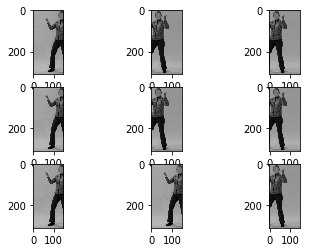

In [0]:

# example of vertical shift image augmentation
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-50,50])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
  
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

##Horizontal Flip

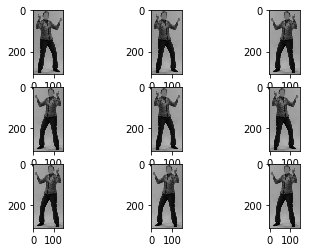

In [0]:
`# example of horizontal flip image augmentation

from matplotlib import pyplot
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

##Rotate

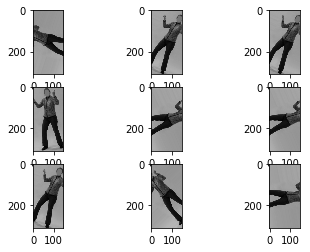

In [0]:
# example of horizontal flip image augmentation

from matplotlib import pyplot
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

##Random Brightness

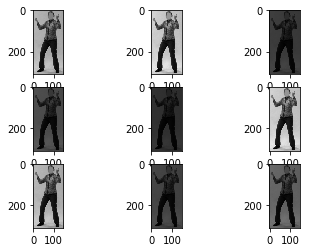

In [0]:
# example of horizontal flip image augmentation

from matplotlib import pyplot
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

##Zoom

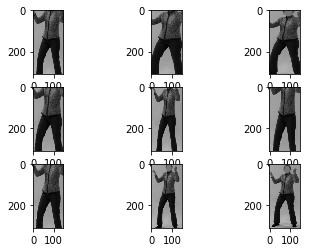

In [0]:
# example of horizontal flip image augmentation

from matplotlib import pyplot
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


In [0]:
!df -h

In [0]:
!cat /proc/cpuinfo

In [0]:
!cat /proc/meminfo

##Feature Standardization

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


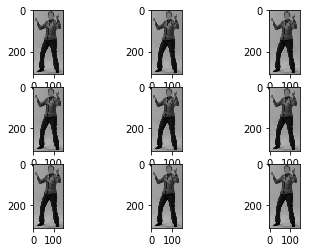

In [0]:
# example of horizontal flip image augmentation

from matplotlib import pyplot
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()



##ZCA WHITENING

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


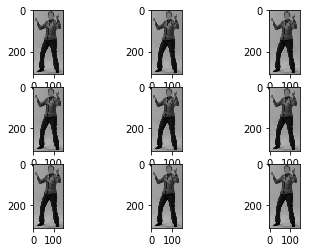

In [0]:
# example of horizontal flip image augmentation

from matplotlib import pyplot
# load the image
img = load_img('/content/gdrive/My Drive/project/BEAST1/Anger/F01AN.bmp')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zca_whitening=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()



#VGG 16

In [0]:
this = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

##Fine Tuning model

In [0]:
for layer in this.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in this.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f613d83dcf8> False
<keras.layers.convolutional.Conv2D object at 0x7f613d83ddd8> False
<keras.layers.convolutional.Conv2D object at 0x7f613d8ae4a8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f613d845630> False
<keras.layers.convolutional.Conv2D object at 0x7f613d8457b8> False
<keras.layers.convolutional.Conv2D object at 0x7f613c7ce0b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f613c7cee48> False
<keras.layers.convolutional.Conv2D object at 0x7f613e151d30> False
<keras.layers.convolutional.Conv2D object at 0x7f613e17f278> False
<keras.layers.convolutional.Conv2D object at 0x7f613e17fb00> False
<keras.layers.pooling.MaxPooling2D object at 0x7f613e131ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f613e131128> False
<keras.layers.convolutional.Conv2D object at 0x7f613e0dc5f8> False
<keras.layers.convolutional.Conv2D object at 0x7f613e0f4d30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f613e109e48>

In [0]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
trainer = models.Sequential()
 
# Add the vgg convolutional base model
trainer.add(this)
 
# Add new layers
trainer.add(layers.Flatten())
trainer.add(layers.Dense(1024, activation='relu'))
trainer.add(layers.Dropout(0.5))
trainer.add(layers.Dense(4, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
trainer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 32,774,660
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
trainer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
'''# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')'''

"# Train the model\nhistory = model.fit_generator(\n      train_generator,\n      steps_per_epoch=train_generator.samples/train_generator.batch_size ,\n      epochs=30,\n      validation_data=validation_generator,\n      validation_steps=validation_generator.samples/validation_generator.batch_size,\n      verbose=1)\n \n# Save the model\nmodel.save('small_last4.h5')"

In [0]:
trainer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 32,774,660
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
this.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

##Fitting Model

In [0]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_gen = datagen.flow(
    x=X_train, y=y_train,
    subset='training',
    #class_mode = 'categorical'
    
                        )
    

val_datagen = datagen.flow(
    x=X_train, y=y_train,
    subset='training',
    #class_mode = 'categorical'
                        )
    
  
test_datagen = datagen.flow(
    x=X_train, y=y_train,
        
    
                        )
    
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:




history = trainer.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                                
                    steps_per_epoch=len(X_train) / 32, validation_data = val_datagen, 
                                validation_steps=32,
                                epochs=20)









test_score = trainer.evaluate(X_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))


NameError: ignored

In [0]:
trainer.reset_states()

In [0]:
#https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

##Confusion Matrix

In [0]:
#predictions = predicted values, mistakenly deleted the cell

matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)

[[13  0  0  3]
 [ 2 13  1  1]
 [ 1  0 13  1]
 [ 0  0  0 16]]


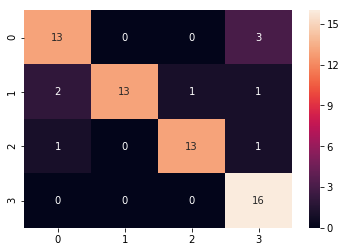

In [0]:
sns.heatmap(matrix,annot=True,fmt='.5g')

In [0]:
#save model
trainer.save('/content/gdrive/My Drive/project/models/Vgg16_20epochs.h5')



#load model
#from keras import load_model
#new_model = load_model('/content/gdrive/My Drive/project/models/Vgg16_20epochs.h5')

##Train Accuracy Plot

In [0]:
print(trainer.history.history.keys())

dict_keys(['loss', 'acc'])


In [0]:
acc = trainer.history.history['acc']
loss = trainer.history.history['loss']
val = trainer.history.history['val_acc']

 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training  loss')
plt.legend()
 
plt.show()

KeyError: ignored

In [0]:
print(history.history.keys())

NameError: ignored

KeyError: ignored

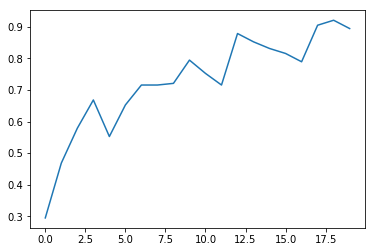

In [0]:
plt.plot(trainer.history.history['acc'])
plt.plot(trainer.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#VGG 19

In [0]:
vgg19 = VGG19(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

80142336/80134624 [==============================] - 2s 0us/step


In [0]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras import optimizers
vgg19.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

##Fine Tuning model

In [0]:
for layer in vgg19.layers[:-5]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg19.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0dd0d219b0> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0d21860> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0d21a90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0dd0d216d8> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0d33400> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0ac7358> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0dd0ae12b0> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0ac7b38> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0a8f160> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0a8f9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0a419b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0dd0a53fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0a53780> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0a05ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f0dd0a1ad30>

In [0]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
trainer_nineteen = models.Sequential()
 
# Add the vgg convolutional base model
trainer_nineteen.add(vgg19)
 

  
# Add new layers
trainer_nineteen.add(layers.Flatten())
trainer_nineteen.add(layers.Dense(1024, activation='relu'))
trainer_nineteen.add(layers.Dropout(0.5))
trainer_nineteen.add(layers.Dense(4, activation='softmax'))

W0731 02:59:19.914990 139698713438080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
trainer_nineteen.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

##Fitting data

In [0]:
vdatagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
vdatagen.fit(X_train)
# fits the model on batches with real-time data augmentation:


trainer_nineteen.fit_generator(vdatagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20)

test_score = trainer_nineteen.evaluate(X_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))


Epoch 1/20
6/5 [==============================] - 160s 27s/step - loss: 2.8706 - acc: 0.2374
Epoch 2/20
6/5 [==============================] - 154s 26s/step - loss: 1.3916 - acc: 0.2785
Epoch 3/20
6/5 [==============================] - 154s 26s/step - loss: 1.3824 - acc: 0.2939
Epoch 4/20
6/5 [==============================] - 154s 26s/step - loss: 1.3805 - acc: 0.2835
Epoch 5/20
6/5 [==============================] - 154s 26s/step - loss: 1.3658 - acc: 0.2948
Epoch 6/20
6/5 [==============================] - 154s 26s/step - loss: 1.4325 - acc: 0.3000
Epoch 7/20
6/5 [==============================] - 154s 26s/step - loss: 1.3963 - acc: 0.3156
Epoch 8/20
6/5 [==============================] - 154s 26s/step - loss: 1.3697 - acc: 0.2899
Epoch 9/20
6/5 [==============================] - 154s 26s/step - loss: 1.3557 - acc: 0.3475
Epoch 10/20
6/5 [==============================] - 154s 26s/step - loss: 1.7314 - acc: 0.3461
Epoch 11/20
6/5 [==============================] - 154s 26s/step - lo

In [0]:
trainer_nineteen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 4100      
Total params: 45,719,620
Trainable params: 35,134,468
Non-trainable params: 10,585,152
_________________________________________________________________


##Confusion Matrix

In [0]:
predictions =  trainer_nineteen.predict(X_test)


In [0]:
import seaborn as sns

In [0]:
from sklearn import metrics, svm, metrics
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)

[[12  0  0  4]
 [ 8  4  2  3]
 [ 9  1  5  0]
 [ 0  0  0 16]]


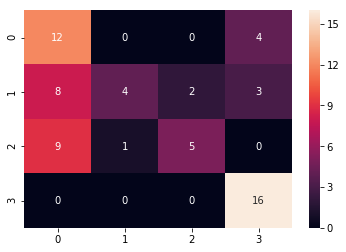

In [0]:
sns.heatmap(matrix,annot=True,fmt='.5g')

In [0]:
#save model
trainer_nineteen.save('/content/gdrive/My Drive/project/models/Vgg19_20epochs.h5')

##Train Accuracy Plot

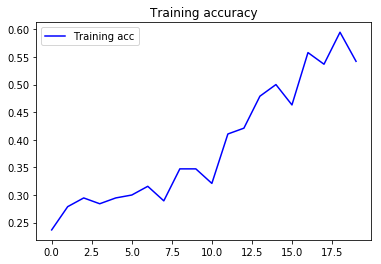

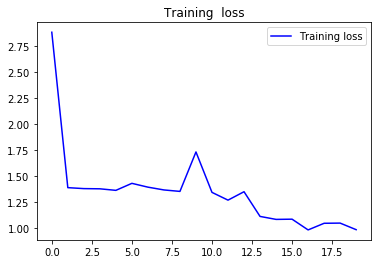

In [0]:
acc = trainer_nineteen.history.history['acc']
loss = trainer_nineteen.history.history['loss']

 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training  loss')
plt.legend()
 
plt.show()

#ResNet 50

In [0]:
ResNet50 = ResNet50(weights='imagenet',include_top=False, input_shape=(224,224, 3))

W0804 23:49:15.586697 140181831206784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



94658560/94653016 [==============================] - 3s 0us/step


In [0]:
ResNet50.summary()

##Fine Tuning Model

In [0]:

x = ResNet50.output
x = Flatten(name='flatten')(x)
predictions = Dense(4, activation='softmax', name='predictions')(x)
Res = Model(inputs=ResNet50.input, outputs=predictions)

for layer in Res.layers[0:141]:
    layer.trainable = False

#https://github.com/keras-team/keras/issues/7177


In [0]:
Res.summary()

##Compile Model

In [0]:
'''Res.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])'''
Res.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

##Fitting Model

In [0]:
Rdatagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
Rdatagen.fit(X_train)
# fits the model on batches with real-time data augmentation:


Res.fit_generator(Rdatagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20)

test_score = Res.evaluate(X_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))


Epoch 1/20
6/5 [==============================] - 72s 12s/step - loss: 8.6165 - acc: 0.2844
Epoch 2/20
6/5 [==============================] - 67s 11s/step - loss: 9.0348 - acc: 0.3267
Epoch 3/20
6/5 [==============================] - 67s 11s/step - loss: 7.3418 - acc: 0.4429
Epoch 4/20
6/5 [==============================] - 67s 11s/step - loss: 4.9929 - acc: 0.5644
Epoch 5/20
6/5 [==============================] - 67s 11s/step - loss: 3.0484 - acc: 0.6586
Epoch 6/20
6/5 [==============================] - 67s 11s/step - loss: 2.2588 - acc: 0.7098
Epoch 7/20
6/5 [==============================] - 67s 11s/step - loss: 2.2830 - acc: 0.7276
Epoch 8/20
6/5 [==============================] - 67s 11s/step - loss: 2.6039 - acc: 0.7009
Epoch 9/20
6/5 [==============================] - 67s 11s/step - loss: 2.7761 - acc: 0.7203
Epoch 10/20
6/5 [==============================] - 68s 11s/step - loss: 1.1017 - acc: 0.8414
Epoch 11/20
6/5 [==============================] - 68s 11s/step - loss: 1.4876 

##Confusion Matrix

In [0]:
predictions =  Res.predict(X_test)

NameError: ignored

In [0]:
from sklearn import  metrics
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)

[[ 3  1 12  0]
 [ 0  1 16  0]
 [ 0  0 15  0]
 [ 0  0 15  1]]


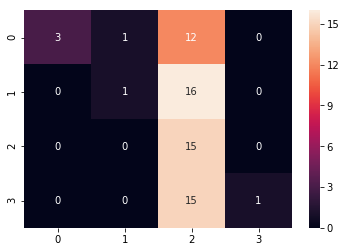

In [0]:
sns.heatmap(matrix,annot=True,fmt='.5g')

In [0]:
#save model
Res.save('/content/gdrive/My Drive/project/models/ResNet50_20epochs.h5')

##Train Accuracy Plot

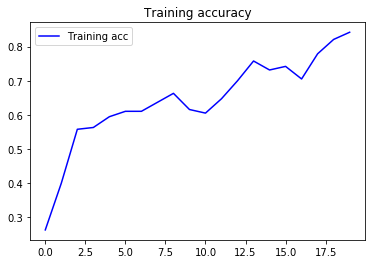

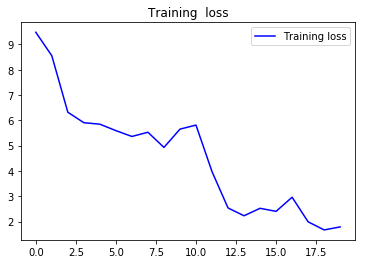

In [0]:
acc = Res.history.history['acc']
loss = Res.history.history['loss']

 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training  loss')
plt.legend()
 
plt.show()

#MobileNet

In [0]:
img_shape = (224,224,3)

In [0]:
MobileNet = MobileNet(input_shape=img_shape, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

In [0]:
MobileNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

##Fine Tuning Model

In [0]:
MobileNet.trainable=False

In [0]:
x = MobileNet.output
x = Flatten(name='flatten')(x)
x = Dense(4, activation='softmax', name='predictions')(x)
#model = Model(inputs=MobileNet.input, outputs=predictions)
updatedModel = Model(MobileNet.input, x)



In [0]:
'''for layer in model.layers[:-5]:
  layer.trainable= False'''

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

##Compile Model

In [0]:
updatedModel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

##Fitting Model

In [0]:
Mdatagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
Mdatagen.fit(X_train)
# fits the model on batches with real-time data augmentation:


updatedModel.fit_generator(Mdatagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=20)

test_score = updatedModel.evaluate(X_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))


Epoch 1/20
6/5 [==============================] - 68s 11s/step - loss: 9.7227 - acc: 0.2893
Epoch 2/20
6/5 [==============================] - 61s 10s/step - loss: 9.6848 - acc: 0.3800
Epoch 3/20
6/5 [==============================] - 61s 10s/step - loss: 9.9479 - acc: 0.3678
Epoch 4/20
6/5 [==============================] - 61s 10s/step - loss: 9.0204 - acc: 0.4371
Epoch 5/20
6/5 [==============================] - 60s 10s/step - loss: 9.3938 - acc: 0.4110
Epoch 6/20
6/5 [==============================] - 61s 10s/step - loss: 9.1001 - acc: 0.4261
Epoch 7/20
6/5 [==============================] - 61s 10s/step - loss: 10.6608 - acc: 0.3212
Epoch 8/20
6/5 [==============================] - 61s 10s/step - loss: 10.2204 - acc: 0.3620
Epoch 9/20
6/5 [==============================] - 61s 10s/step - loss: 9.3503 - acc: 0.4165
Epoch 10/20
6/5 [==============================] - 61s 10s/step - loss: 10.3378 - acc: 0.3461
Epoch 11/20
6/5 [==============================] - 61s 10s/step - loss: 9.64

##Confusion Matrix

In [0]:
predictions =  updatedModel.predict(X_test)

In [0]:
from sklearn import  metrics
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)

[[ 0 16  0  0]
 [ 0 17  0  0]
 [ 0 15  0  0]
 [ 0 16  0  0]]


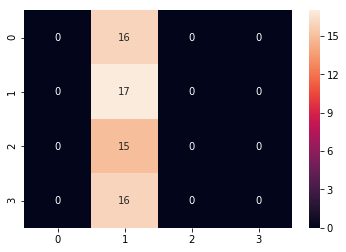

In [0]:
sns.heatmap(matrix,annot=True,fmt='.5g')

In [0]:
predictions

#POSE ESTIMATION

In [0]:
# Specify the paths for the 2 files
protoFile =    "/content/gdrive/My Drive/project/openpose-master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile =  "/content/gdrive/My Drive/project/openpose-master/pose_iter_160000.caffemodel"
 
# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [0]:
# Read image
frame = cv2.imread("/content/gdrive/My Drive/project/BEAST1/Fear/F13FE.bmp")
 
# Specify the input image dimensions

frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

inWidth = 138
inHeight = 310 
# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
 
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)


output = net.forward()


H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
for i in range(15):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
 
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
 
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
 
    if prob > threshold :
        cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
       #cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), thickness = 1, lineType=cv2.LINE_AA)
 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)


POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]
 
    if points[partA] and points[partB]:
        cv2.line(frameCopy, points[partA], points[partB], (0, 255, 0), 3)


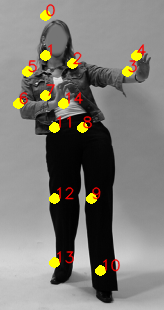

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)


In [0]:
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]
 
    if points[partA] and points[partB]:
        cv2.line(frameCopy, points[partA], points[partB], (0, 255, 0), 3)

##plots

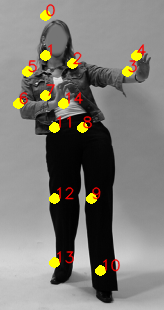

In [0]:
cv2_imshow(frame)

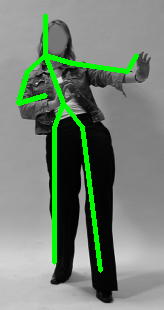

In [0]:


cv2_imshow(frameCopy)


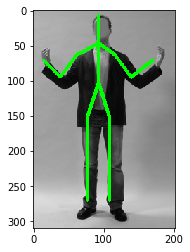

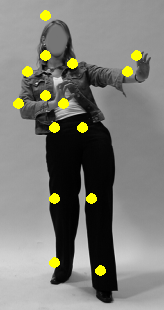

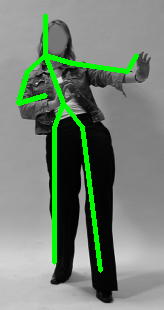

In [0]:
cv2_imshow(frame)

cv2_imshow(frameCopy)


##Placing 3D models on Images

In [0]:
#http://www.robots.ox.ac.uk/~vgg/data/pose_evaluation/
#http://human-pose.mpi-inf.mpg.de/


In [0]:
listdir("/content/gdrive/My Drive/project/BEASTskeleton/Anger/")

DATADIR = "/content/gdrive/My Drive/project/BEASTskeleton/"
skeleton_data = []

def create_skeleton_data():
    for category in CATEGORIES:  # 

        path = os.path.join(DATADIR,category)  # create path to Emotion categories
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            
                #img_array = cv2.imread(os.path.join(path,img)) 
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (138, 310))  # resize to normalize data size
                #new_array = cv2.resize(img_array, (138, 310))  # resize to normalize data size
                
                          
                
                # Read image
                frame = new_array

                # Specify the input image dimensions

                frameCopy = np.copy(frame)
                frameWidth = frame.shape[1]
                frameHeight = frame.shape[0]
                threshold = 0.1

                # Prepare the frame to be fed to the network
                inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

                # Set the prepared object as the input blob of the network
                net.setInput(inpBlob)


                output = net.forward()              
                H = output.shape[2]
                W = output.shape[3]
                # Empty list to store the detected keypoints
                points = []
                for i in range(15):
                    # confidence map of corresponding body's part.
                    probMap = output[0, i, :, :]

                    # Find global maxima of the probMap.
                    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

                    # Scale the point to fit on the original image
                    x = (frameWidth * point[0]) / W
                    y = (frameHeight * point[1]) / H

                    if prob > threshold :
                        cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
                        #cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 3, lineType=cv2.LINE_AA)

                        # Add the point to the list if the probability is greater than the threshold
                        points.append((int(x), int(y)))
                    else :
                        points.append(None)


                POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

                for pair in POSE_PAIRS:
                    partA = pair[0]
                    partB = pair[1]

                    if points[partA] and points[partB]:
                        cv2.line(frameCopy, points[partA], points[partB], (0, 255, 0), 3)

            
                
                skeleton_data.append([frameCopy, class_num])  # add this to our training_data
            #except Exception as e:  # in the interest in keeping the output clean...
            #   pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_skeleton_data()

#print(len(training_data))



100%|██████████| 62/62 [01:37<00:00,  1.55s/it]


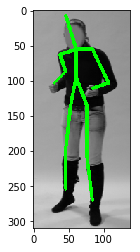

In [0]:
plt.imshow(skeleton_data[10][0])

In [0]:
 sk_Features = []
sk_y = []

for features,label in training_data:
    sk_Features.append(features)
    sk_y.append(label)

    
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example

sk_y = array(sk_y)
sk_y = to_categorical(y)

In [0]:
sk_y[0]

array([0., 0., 1., 0.], dtype=float32)

In [0]:
sk_X[0]

In [0]:
sk_X = np.array(sk_Features).reshape(-3, 224, 224, 3)
from sklearn.model_selection import train_test_split
skX_train, skX_test, sky_train, sky_test = train_test_split(sk_X, sk_y, stratify=sk_y, test_size=0.25, random_state=42)

In [0]:
model_copy = keras.models.clone_model(trainer)
model_copy.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 32,774,660
Non-trainable params: 7,635,264
_________________________________________________________________


##Fitting Data

In [0]:
model_copy.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

datagenx = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip=True)


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagenx.fit(skX_train)

# fits the model on batches with real-time data augmentation:

model_copy.fit_generator(datagenx.flow(skX_train, sky_train, batch_size=32),
                    steps_per_epoch=len(skX_train) / 32, epochs=20)

test_score = model_copy.evaluate(skX_test, sky_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

SyntaxError: ignored

#Segmentation

In [0]:
#http://people.inf.ethz.ch/aksoyy/sss/
#https://neurohive.io/en/popular-networks/r-cnn/
#https://neurohive.io/en/popular-networks/u-net/
#https://neurohive.io/en/state-of-the-art/image-editing-becomes-easy-with-semantically-meaningful-objects-generated/
#

In [0]:
import sys
print(sys.version)

3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [0]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
